In [208]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import scanpy as sc
import sklearn
from scipy.stats import pearsonr

In [251]:
import gseapy as gp

# Retrieve the list of available gene set libraries
libraries = gp.get_library_name()
print(libraries)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and

In [ ]:
RNA_data = sc.read_h5ad('../scButterfly/data/lymphoma/lymphoma_RNA.h5ad')
RNA_data
genes = list(RNA_data.var_names)
RNA_df = pd.DataFrame(RNA_data.X.toarray(), columns=genes)

/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
trrust = pd.read_csv("../Benchmarking/data/trrust_rawdata.human.tsv", sep="\t", header=None)
trrust.columns = ["TF", "Target", "Regulation", "PMID"]
tftg = trrust[["TF", "Target"]].drop_duplicates()


In [ ]:
trrust

,TF,Target,Regulation,PMID
0,AATF,BAX,Repression,22909821
1,AATF,CDKN1A,Unknown,17157788
2,AATF,KLK3,Unknown,23146908
3,AATF,MYC,Activation,20549547
4,AATF,TP53,Unknown,17157788
...,...,...,...,...
9391,ZNF76,CDKN1A,Repression,15280358
9392,ZNF76,PCYT1A,Activation,14702349
9393,ZNF76,TALDO1,Unknown,14702349
9394,ZNRD1,ABCB1,Activation,16373708


In [ ]:
tftg_filtered = tftg[tftg["TF"].isin(genes) & tftg["Target"].isin(genes)].reset_index(drop=True)

In [ ]:
tftg_filtered

,TF,Target
0,AATF,BAX
1,AATF,CDKN1A
2,AATF,KLK3
3,AATF,MYC
4,AATF,TP53
...,...,...
8343,ZNF76,CDKN1A
8344,ZNF76,PCYT1A
8345,ZNF76,TALDO1
8346,ZNRD1,ABCB1


In [ ]:
def compute_tf_target_corr(pairs, expr_df, method="pearson"):
    correlations = []
    for _, row in pairs.iterrows():
        tf_expr = expr_df[row["TF"]]
        target_expr = expr_df[row["Target"]]
        if method == "pearson":
            r_value, p_value = pearsonr(tf_expr, target_expr)
        correlations.append((r_value, p_value))
    return pd.concat([pairs, pd.DataFrame(correlations, columns=["Correlation", "P-value"])], axis=1)

In [ ]:
corr = compute_tf_target_corr(tftg_filtered, RNA_df, method="pearson")

/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
corr

,TF,Target,Correlation,P-value
0,AATF,BAX,0.064453,5.839254e-15
1,AATF,CDKN1A,0.017179,3.762473e-02
2,AATF,KLK3,0.007489,3.648109e-01
3,AATF,MYC,0.063337,1.695127e-14
4,AATF,TP53,0.084531,1.218585e-24
...,...,...,...,...
8343,ZNF76,CDKN1A,0.010632,1.982477e-01
8344,ZNF76,PCYT1A,0.100810,2.154979e-34
8345,ZNF76,TALDO1,0.048268,5.093731e-09
8346,ZNRD1,ABCB1,0.045747,3.049790e-08


In [154]:
RNA_data[:, RNA_data.var['highly_variable']].write('/workspace/Benchmarking/data_scbutterfly/lymphoma_RNA_hv.h5ad')

In [188]:
RNA_data[:, RNA_data.var['highly_variable']].var_names 

Index(['LINC02593', 'SAMD11', 'SDF4', 'ACAP3', 'SSU72', 'CDK11B', 'PRDM16',
       'RPL22', 'ICMT', 'ESPN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=3000)

In [264]:
RNA_data = sc.read_h5ad('/workspace/scButterfly/data/lymphoma/lymphoma_RNA_pp.h5ad')
pd.Series(RNA_data.obs['Cell Types'].unique())

/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



0             Tumor B
1                   T
2           T cycling
3                Mono
4         low GEX mix
5     Tumor B cycling
6                   B
7          Mono/B mix
8             B/T mix
9          Mono/T mix
10        unknown mix
11                pDC
12      Stromal cells
13                NaN
14        Fibroblasts
dtype: category
Categories (14, object): [' B/T mix', 'B', 'Fibroblasts', 'Mono', ..., 'Tumor B cycling', 'low GEX mix', 'pDC', 'unknown mix']

In [265]:
RNA_data.obs['group'] = RNA_data.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_gsea = RNA_data[RNA_data.obs['group'].isin(['B','LYM'])].copy()

/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



In [266]:
data_gsea = data_gsea[:, data_gsea.var['highly_variable']]

In [268]:
sc.pp.log1p(data_gsea)

In [269]:
sc.tl.rank_genes_groups(
    data_gsea,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

In [270]:
de = sc.get.rank_genes_groups_df(data_gsea, group='LYM')
de['neg_log10_padj'] = -np.log10(de['pvals_adj'].replace(0, np.nan))

In [271]:
df = de.copy()

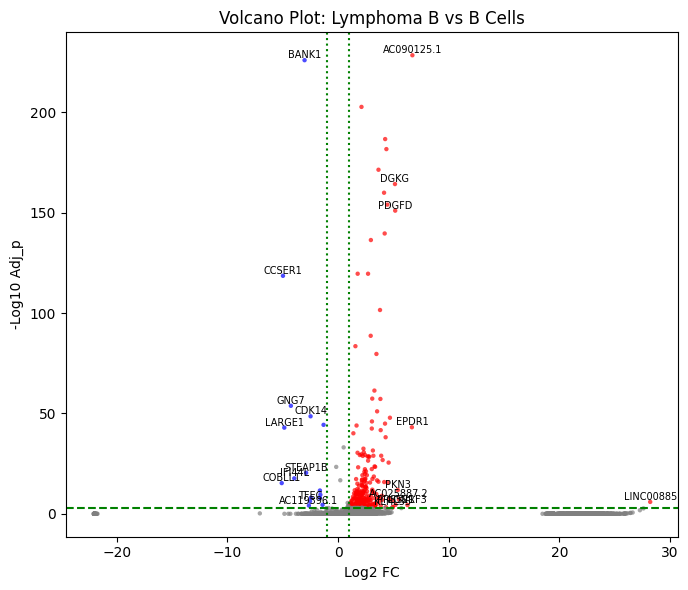

In [272]:
df['color'] = 'grey'
df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.001), 'color'] = 'red'
df.loc[(df['logfoldchanges'] < -1) & (df['pvals_adj'] < 0.001), 'color'] = 'blue'

plt.figure(figsize=(7, 6))
plt.scatter(df['logfoldchanges'], df['neg_log10_padj'], s=10, alpha=0.7, c=df['color'], edgecolor='none')
plt.axhline(-np.log10(0.001), color='green', linestyle='--')
plt.axvline(1, color='green', linestyle='dotted')
plt.axvline(-1, color='green', linestyle='dotted')

sig_df = df[df['pvals_adj'] < 0.001]
top_up = sig_df.sort_values(by='logfoldchanges', ascending=False).head(10)
top_down = sig_df.sort_values(by='logfoldchanges', ascending=True).head(10)

for _, row in pd.concat([top_up, top_down]).iterrows():
    plt.text(row['logfoldchanges'], row['neg_log10_padj'],
             row['names'], fontsize=7, ha='center', va='bottom', color='black')

plt.xlabel('Log2 FC')
plt.ylabel('-Log10 Adj_p')
plt.title('Volcano Plot: Lymphoma B vs B Cells')
plt.tight_layout()
plt.show()

In [249]:
import plotly.express as px
import pandas as pd
import numpy as np

# Color logic
df['regulation'] = 'Not significant'
df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.05), 'regulation'] = 'Upregulated'
df.loc[(df['logfoldchanges'] < -1) & (df['pvals_adj'] < 0.05), 'regulation'] = 'Downregulated'

# Create interactive plot
fig = px.scatter(
    df,
    x='logfoldchanges',
    y='neg_log10_padj',
    color='regulation',
    hover_data=['names', 'logfoldchanges', 'pvals_adj'],
    color_discrete_map={
        'Upregulated': 'red',
        'Downregulated': 'blue',
        'Not significant': 'lightgray'
    },
    title='Interactive Volcano Plot',
    labels={
        'logfoldchanges': 'Log2 Fold Change',
        'neg_log10_padj': '-Log10 Adjusted P-Value'
    }
)

# Add text labels for top genes
for i, row in pd.concat([top_up, top_down]).iterrows():
    fig.add_annotation(
        x=row['logfoldchanges'],
        y=row['neg_log10_padj'],
        text=row['names'],
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-20,
        font=dict(size=10)
    )

fig.update_layout(
    template='simple_white',
    legend_title_text='Gene Regulation',
    hovermode='closest'
)

fig.show()


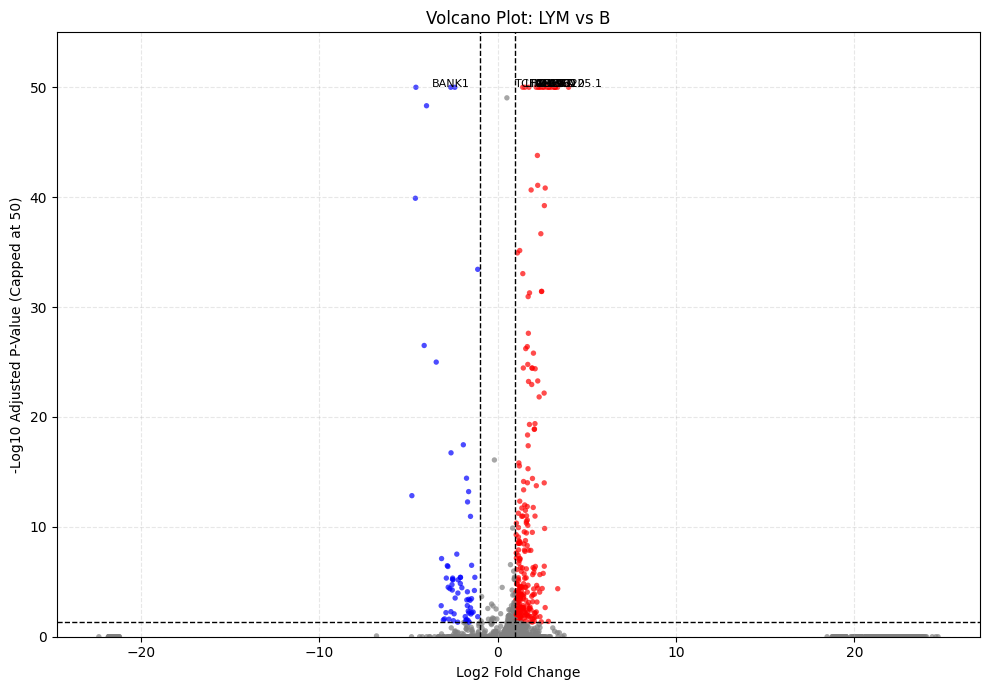

In [ ]:
# Cap y-values for visualization
y_cap = 50
df['neg_log10_padj_capped'] = df['neg_log10_padj'].clip(upper=y_cap)

# Define significance
df['color'] = 'grey'
df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.05), 'color'] = 'red'
df.loc[(df['logfoldchanges'] < -1) & (df['pvals_adj'] < 0.05), 'color'] = 'blue'

# Create plot
plt.figure(figsize=(10, 7))
plt.scatter(df['logfoldchanges'], df['neg_log10_padj_capped'], c=df['color'], alpha=0.7, s=15, edgecolor='none')
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=1)
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='black', linestyle='--', linewidth=1)

# Label top 10 most significant genes
top_genes = df.nsmallest(10, 'pvals_adj')
for _, row in top_genes.iterrows():
    plt.text(row['logfoldchanges'], min(row['neg_log10_padj_capped'] + 1, y_cap),
             row['names'], fontsize=8, ha='center', color='black')

plt.title("Volcano Plot: LYM vs B")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted P-Value (Capped at 50)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim([0, y_cap + 5])
plt.tight_layout()
plt.show()

In [273]:
pre_rank = de[['names','logfoldchanges']].dropna()
pre_rank = pre_rank.set_index('names')['logfoldchanges'].sort_values(ascending=False)

In [274]:
pre_rank

names
LINC00885     28.199322
AC124254.2    27.587738
VASH2         27.266937
MYO3B         26.611078
AC106897.1    26.422716
                ...    
AL355053.1   -22.036936
AP000345.3   -22.037790
SERPINB2     -22.042740
LINC01756    -22.091923
AP001269.2   -22.091923
Name: logfoldchanges, Length: 3000, dtype: float32

In [275]:
gs_res = gp.prerank(
    rnk=pre_rank,
    gene_sets='MSigDB_Hallmark_2020',
    threads=4,
    permutation_num=100,      # reduce for speed, increase for robustness
    outdir=None,              # don’t write to disk
    seed=42,
)


2025-05-20 14:26:30,645 [WARNING] Duplicated values found in preranked stats: 6.93% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [276]:
gs_res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,UV Response Dn,0.64578,1.122987,0.14,1.0,0.95,3/16,13.40%,TFPI;MMP16;COL11A1
1,prerank,Epithelial Mesenchymal Transition,0.560904,1.039006,0.29,1.0,1.0,11/46,19.23%,SFRP4;LAMA2;TNC;THBS1;COL5A3;PLOD2;DCN;CDH11;C...
2,prerank,Estrogen Response Early,0.582842,1.032519,0.45,1.0,1.0,5/21,15.30%,FOS;CLIC3;GFRA1;ELOVL2;TSKU
3,prerank,Estrogen Response Late,0.560772,1.025566,0.494949,1.0,1.0,8/22,30.27%,FOS;CD9;PKP3;CLIC3;PTGER3;FGFR3;TPBG;CYP4F11
4,prerank,Apical Junction,0.561704,1.00689,0.55,1.0,1.0,9/22,35.23%,VWF;NRXN2;PARVA;CNTN1;CDH11;COL16A1;ADRA1B;DSC...
5,prerank,Complement,-0.288255,-1.0,1.0,1.0,0.0,2/38,0.83%,SERPINB2;S100A12
6,prerank,Oxidative Phosphorylation,-0.461826,-1.0,1.0,1.0,0.0,53/53,54.67%,SLC25A6;CYB5R3;PDP1;ATP5ME;NDUFA2;COX5B;ATP5F1...
7,prerank,Unfolded Protein Response,-0.385595,-1.0,1.0,1.0,0.0,15/15,61.67%,CCL2;EEF2;RPS14;PREB;POP4;NOP14;NOLC1;ATP6V0D1...
8,prerank,IL-2/STAT5 Signaling,-0.326394,-1.0,1.0,1.0,0.0,22/22,67.63%,SELL;IGF1R;IL1R2;LTB;ICOS;CAPG;SPP1;ITGA6;IKZF...
9,prerank,G2-M Checkpoint,-0.386112,-1.0,1.0,1.0,0.0,19/19,61.67%,MT2A;EFNA5;HMGN2;HMGB3;RPA2;NCL;CDKN3;NOLC1;CE...


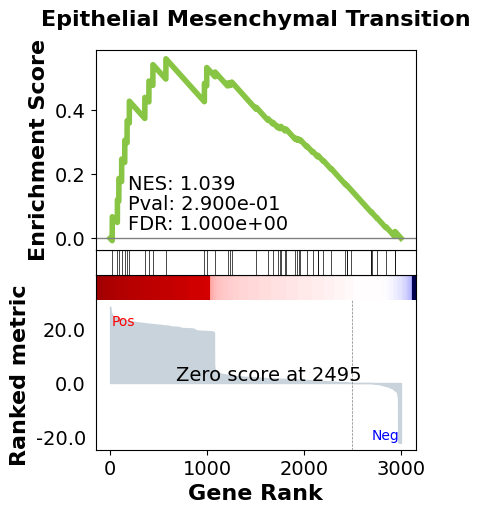

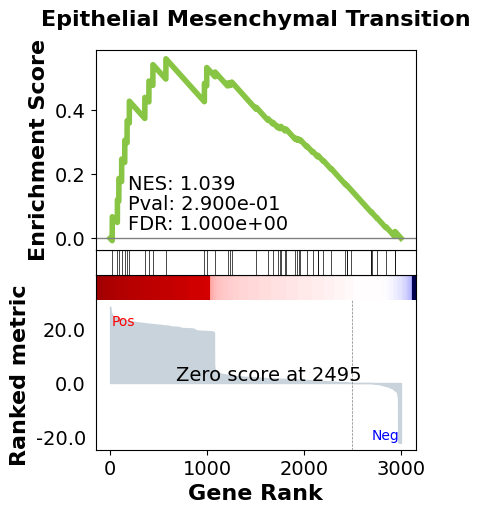

In [279]:
terms = gs_res.res2d.Term
gs_res.plot(terms=terms[1])